In [1]:
from coc131_cw import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
coc = COC131()

#### **Question 1**
This function loads and preprocesses the EuroSAT_RGB image dataset by resizing images to 32×32, flattening them into numpy arrays, and storing them with their labels in self.x and self.y. It returns the processed array and class label of a specific image file if provided.

In [2]:
res1, res2 = coc.q1('AnnualCrop_1.jpg')
print(f"res1: {res1} | res2: {res2}") 
print(f"Shape: {res1.shape}")

res1: [149. 121. 120. ... 106.  94. 104.] | res2: AnnualCrop
Shape: (3072,)


#### **Question 2**
This function standardizes the input data to have a mean of 0 and a standard deviation of 2.5 using StandardScaler, and returns the transformed data along with the scaler object.

Standardized Data:
 [[ 3.09729958  1.92338717  1.5778442  ...  0.88276404 -0.19704766
   0.01473883]
 [-1.50333056  0.18234666 -1.73729847 ...  4.14816893  2.22844746
   0.72204561]
 [-0.81076258 -0.27183782 -0.44807632 ...  5.65902792  4.65394259
   4.17016614]
 ...
 [-2.74005909 -3.07264213 -2.19773495 ... -2.82127734 -3.13704175
  -1.9303548 ]
 [-1.60226884 -1.86148351 -2.01356036 ... -1.70031745 -1.74054456
  -1.9303548 ]
 [ 0.77224994  0.33374149  0.56488394 ...  0.39539017 -0.05004795
   0.19156553]]
------------------------------------------------------------------------------------------------------------------------
Shape of standardized data: (27000, 3072)
------------------------------------------------------------------------------------------------------------------------
Scaler mean (per feature): [ 86.38925926  95.59111111 102.86577778 ...  87.88733333  96.68092593
 103.8332963 ]
--------------------------------------------------------------------------------------------

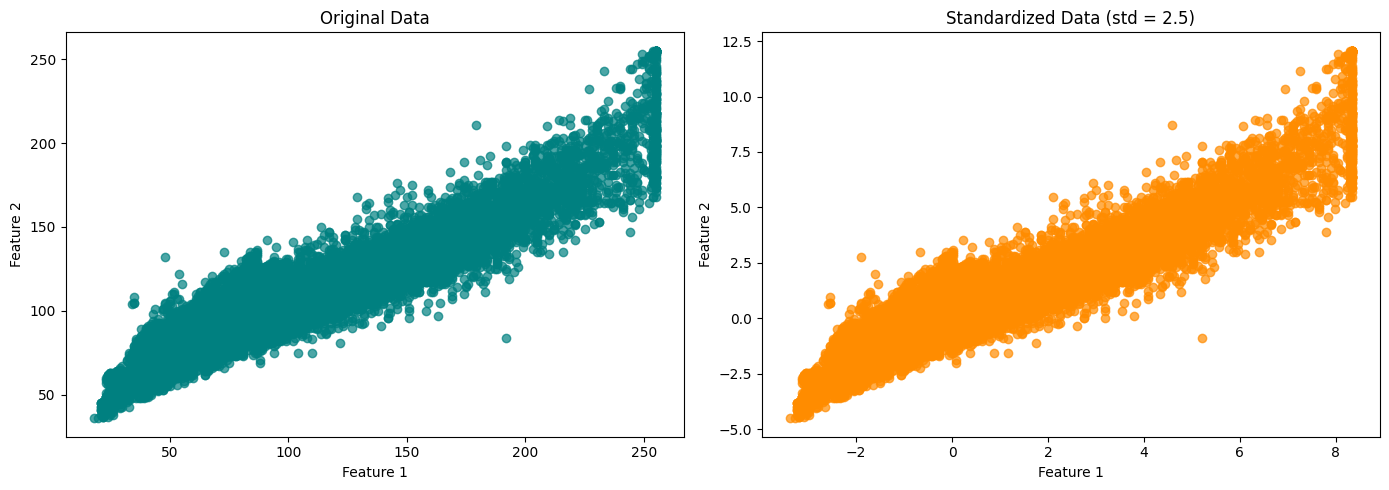

In [3]:
standardisedData, scalar = coc.q2(coc.x)

print(f"Standardized Data:\n {standardisedData}")
print("-" * 120)
print(f"Shape of standardized data: {standardisedData.shape}")
print("-" * 120)
print(f"Scaler mean (per feature): {scalar.mean_}")
print("-" * 120)
print(f"Scaler scale (std before multiplying): {scalar.scale_}")
print("-" * 120)
print(f"Standard deviation after scaling to 2.5: {scalar.scale_ * 2.5}")
print("-" * 120)


def plot_data_comparison(data, standardisedData):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Original data
    axes[0].scatter(data[:, 0], data[:, 1], alpha=0.7, color='teal')
    axes[0].set_title("Original Data")
    axes[0].set_xlabel("Feature 1")
    axes[0].set_ylabel("Feature 2")

    # Standardized data
    axes[1].scatter(standardisedData[:, 0], standardisedData[:, 1], alpha=0.7, color='darkorange')
    axes[1].set_title("Standardized Data (std = 2.5)")
    axes[1].set_xlabel("Feature 1")
    axes[1].set_ylabel("Feature 2")

    plt.tight_layout()
    plt.show()

plot_data_comparison(coc.x, standardisedData)

#### **Question 3**
This function trains and evaluates a Multi-Layer Perceptron (MLP) classifier on the standardized dataset, optionally using hyperparameter tuning via a manual grid search. It either uses a provided train-test split or creates one, then trains models over several epochs while tracking loss and accuracy, ultimately returning the best-performing model along with its loss and accuracy curves.

{'hidden_layer_sizes': (128, 64), 'learning_rate_init': 0.005, 'activation': 'relu', 'momentum': 0.95, 'learning_rate': 'constant', 'solver': 'sgd', 'max_iter': 1, 'warm_start': True}
Final Training Accuracy: 0.7304
Final Testing Accuracy: 0.6378
Loss Curve: [1.52007496 1.14754586 1.02004119 0.93216983 0.86459835]


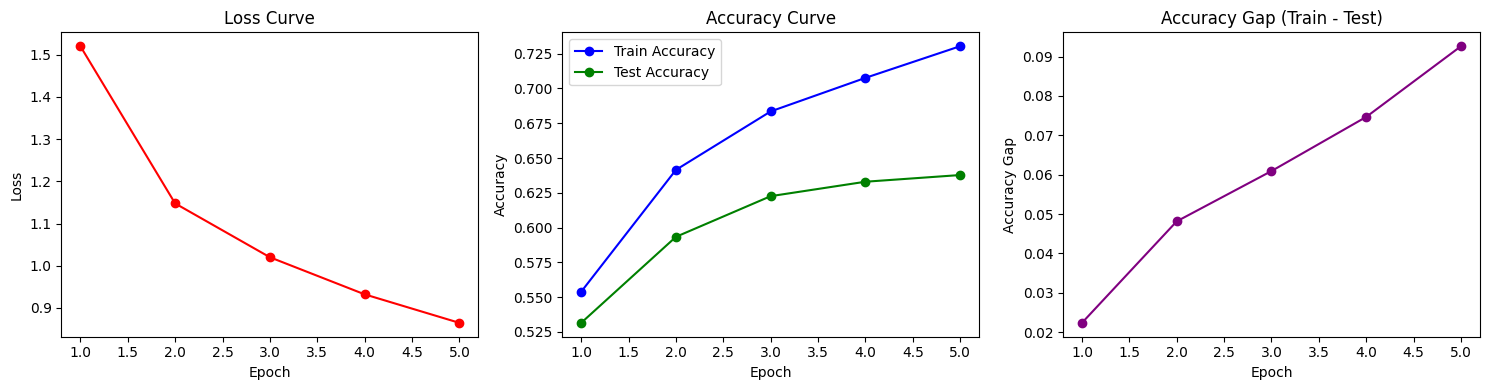

In [4]:
best_model, best_loss_curve, best_train_curve, best_test_curve = coc.q3(test_size=0.2)

print(f"Final Training Accuracy: {round(best_train_curve[-1], 4)}")
print(f"Final Testing Accuracy: {round(best_test_curve[-1], 4)}")
print(f"Loss Curve: {best_loss_curve}")


def plot_hyperparam_results(loss_curve, train_curve, test_curve):
    epochs = range(1, len(loss_curve) + 1)

    plt.figure(figsize=(15, 4))

    # Loss Curve
    plt.subplot(1, 3, 1)
    plt.plot(epochs, loss_curve, marker='o', color='red')
    plt.title("Loss Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    # Accuracy Curve
    plt.subplot(1, 3, 2)
    plt.plot(epochs, train_curve, marker='o', label='Train Accuracy', color='blue')
    plt.plot(epochs, test_curve, marker='o', label='Test Accuracy', color='green')
    plt.title("Accuracy Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    # Accuracy Gap (Train - Test)
    plt.subplot(1, 3, 3)
    acc_gap = train_curve - test_curve
    plt.plot(epochs, acc_gap, marker='o', color='purple')
    plt.title("Accuracy Gap (Train - Test)")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy Gap")

    plt.tight_layout()
    plt.show()

plot_hyperparam_results(best_loss_curve, best_train_curve, best_test_curve)

#### **Question 4**
This function evaluates the impact of different regularization strengths (alpha values) on the performance of an MLP classifier. For each alpha, it trains a model from scratch using the best-found hyperparameters, tracks training and testing accuracy over several epochs, and returns a dictionary containing the performance metrics for each alpha value.

Results: {0.0001: {'loss_curve': array([1.84542083, 1.50752659, 1.38290767, 1.30747355, 1.25182578]), 'train_acc_curve': array([0.41486111, 0.50055556, 0.53416667, 0.55810185, 0.57527778]), 'test_acc_curve': array([0.39555556, 0.48388889, 0.51333333, 0.53518519, 0.55203704])}, 0.001: {'loss_curve': array([1.8462041 , 1.50828018, 1.38364344, 1.3079815 , 1.2527186 ]), 'train_acc_curve': array([0.41472222, 0.50069444, 0.53462963, 0.55907407, 0.57564815]), 'test_acc_curve': array([0.39518519, 0.48407407, 0.51537037, 0.53425926, 0.55203704])}, 0.01: {'loss_curve': array([1.85408261, 1.51557853, 1.39145274, 1.31631368, 1.26115171]), 'train_acc_curve': array([0.41486111, 0.50027778, 0.53388889, 0.55787037, 0.57462963]), 'test_acc_curve': array([0.39666667, 0.4837037 , 0.51574074, 0.53555556, 0.54944444])}, 0.1: {'loss_curve': array([1.9324258 , 1.59441552, 1.47042117, 1.39527665, 1.34020126]), 'train_acc_curve': array([0.41597222, 0.50087963, 0.53388889, 0.55689815, 0.5737963 ]), 'test_acc_cu

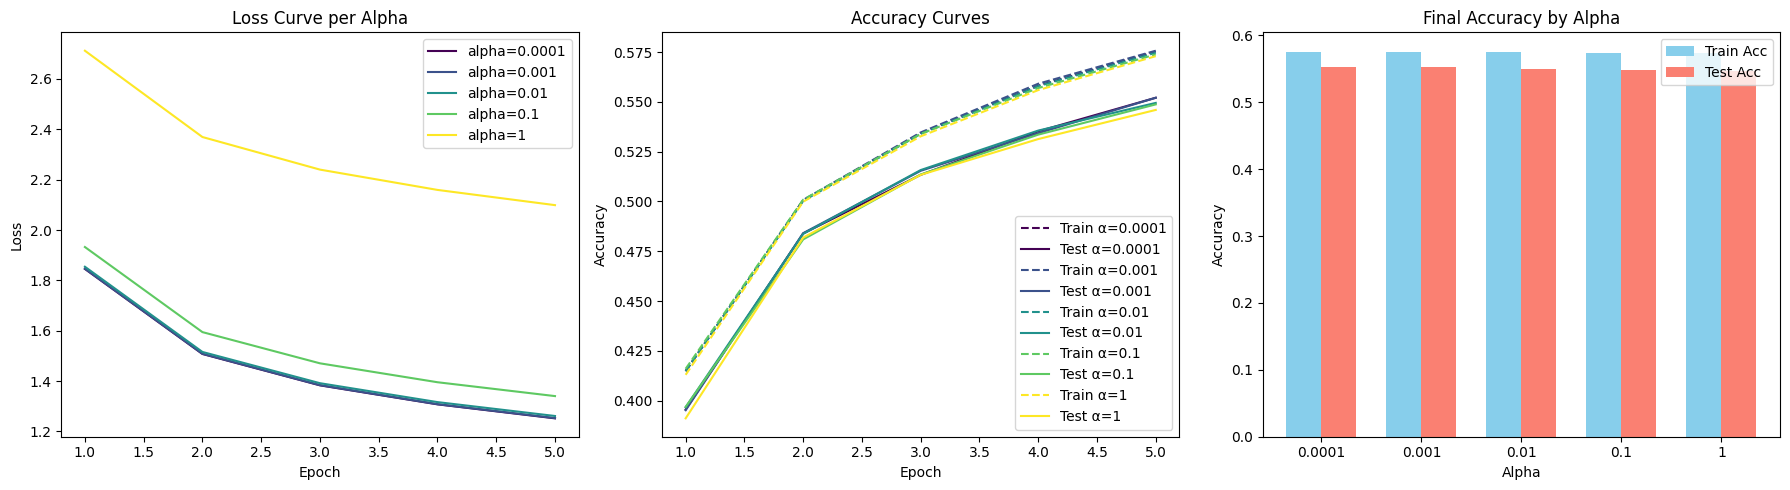

In [17]:
results = coc.q4(test_size=0.2)

print(f"Results: {results}")

for alpha, metrics in results.items():
    print(f"Alpha: {alpha}")
    print(f"Loss Curve: {metrics['loss_curve']}")
    print(f"Training Accuracy Curve: {metrics['train_acc_curve']}")
    print(f"Testing Accuracy Curve: {metrics['test_acc_curve']}")
    print("-" * 40)



def plot_alpha_impact(results):
    alphas = sorted(results.keys())
    epochs = range(1, len(next(iter(results.values()))['loss_curve']) + 1)

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    colors = plt.cm.viridis(np.linspace(0, 1, len(alphas)))

    # Loss Curves
    for i, alpha in enumerate(alphas):
        axes[0].plot(epochs, results[alpha]['loss_curve'], label=f'alpha={alpha}', color=colors[i])
    axes[0].set_title("Loss Curve per Alpha")
    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel("Loss")
    axes[0].legend()

    # Accuracy Curves
    for i, alpha in enumerate(alphas):
        axes[1].plot(epochs, results[alpha]['train_acc_curve'], linestyle='--', color=colors[i], label=f'Train α={alpha}')
        axes[1].plot(epochs, results[alpha]['test_acc_curve'], linestyle='-', color=colors[i], label=f'Test α={alpha}')
    axes[1].set_title("Accuracy Curves")
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("Accuracy")
    axes[1].legend()

    # Final Accuracy Comparison
    final_train = [results[alpha]['train_acc_curve'][-1] for alpha in alphas]
    final_test = [results[alpha]['test_acc_curve'][-1] for alpha in alphas]
    width = 0.35
    x = np.arange(len(alphas))
    axes[2].bar(x - width/2, final_train, width, label='Train Acc', color='skyblue')
    axes[2].bar(x + width/2, final_test, width, label='Test Acc', color='salmon')
    axes[2].set_xticks(x)
    axes[2].set_xticklabels([str(alpha) for alpha in alphas])
    axes[2].set_title("Final Accuracy by Alpha")
    axes[2].set_xlabel("Alpha")
    axes[2].set_ylabel("Accuracy")
    axes[2].legend()

    plt.tight_layout()
    plt.show()


plot_alpha_impact(results)


#### **Question 5**
This function compares the performance of an MLP classifier using 5-fold cross-validation with and without stratification to determine if the splitting method affects accuracy. It calculates mean accuracies for both approaches, performs a statistical t-test on the results, and returns the accuracies, p-value, and a conclusion based on the test.

X shape: (27000, 3072)
y shape: (27000,)
Scores without Stratification: [0.11018519 0.22944444 0.10796296 0.10574074 0.32666667]
Scores with Stratification: [0.50666667 0.22925926 0.24518519 0.42037037 0.11203704]
Final Testing Accuracy without Stratification: 0.176
Final Testing Accuracy with Stratification: 0.3027037037037037
P-value: 0.1683282466548282
Conclusion: Splitting method had no effect


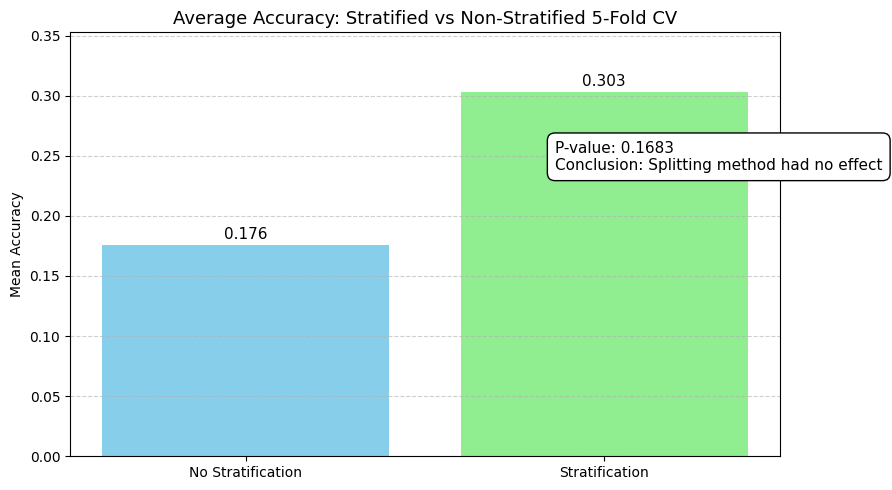

In [9]:
res1, res2, res3, res4 = coc.q5()

print(f"Final Testing Accuracy without Stratification: {res1}")
print(f"Final Testing Accuracy with Stratification: {res2}")
print(f"P-value: {res3}")
print(f"Conclusion: {res4}")


def plot_test_results(accuracy_values, labels, delta):
    colors = ['skyblue', 'lightgreen']

    plt.figure(figsize=(9, 6))
    bars = plt.bar(labels, accuracy_values, color=colors)

    # Annotate bar heights
    for bar, acc in zip(bars, accuracy_values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                f'{acc:.3f}', ha='center', fontsize=11)

    # Δ Accuracy annotation
    plt.text(0.5, max(accuracy_values) + 0.025,
            f"Δ Accuracy: {delta:.4f}",
            ha='center', fontsize=12, fontweight='bold')

    # Significance line
    if res3 < 0.05:
        plt.axhline(y=max(accuracy_values), color='red', linestyle='--', linewidth=1)
        plt.text(0.5, max(accuracy_values) + 0.01, 'p < 0.05 → Significant',
                color='red', ha='center', fontsize=10)

    # Titles and labels
    plt.title("Impact of Stratified Splitting on MLP Accuracy (5-Fold CV)", fontsize=13)
    plt.suptitle("Model: MLPClassifier | Hidden layers: (128, 64) | Learning rate: 0.005", fontsize=9, y=0.93)
    plt.ylabel('Mean Accuracy')
    plt.ylim(0, max(accuracy_values) + 0.07)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Conclusion
    textstr = f'P-value: {res3:.4f}\nConclusion:\n{res4}'
    plt.gcf().text(0.7, 0.5, textstr, fontsize=11,
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

    plt.tight_layout()
    plt.show()

plot_test_results([res1, res2], ['No Stratification', 'Stratification'], res2 - res1)

#### **Question 6**
This function performs unsupervised dimensionality reduction on the dataset using Locally Linear Embedding (LLE) to project it into 2 dimensions.

C:\Users\Robert\AppData\Roaming\Python\Python313\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Robert\AppData\Roaming\Python\Python313\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python313\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^

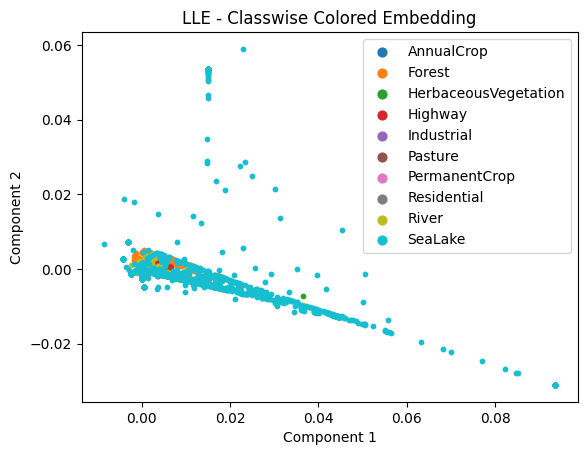

In [8]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(coc.y)

transformed_data = coc.q6()

classes = encoder.classes_
for class_index, class_name in enumerate(classes):
    plt.scatter(
        transformed_data[y_encoded == class_index, 0],
        transformed_data[y_encoded == class_index, 1],
        label=class_name,
        s=10
    )
plt.legend(markerscale=2)
plt.title('LLE - Classwise Colored Embedding')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()